# 변수
` 데이터를 저장하는 공간의 이름


# 경로 (절대 경로 / 상대 경로)
> 절대 경로
- 절대적인 주소
- 환경에 상관 없이 고정된 위치를 표현
- ex) "c\users\document", "https://www.google.com"
> 상대경로
- 상대적인 주소
- 환경에 따라서 주소가 변화
- 현재 작업중인 디렉토리에서 이동
- ex)
    - 현재 디렉토리 : ./
    - 상위 디렉토리 : ../
    - 하위 디렉토리 : ./폴더명/ 혹은 폴더명/
    - 상ㅇ위에서 상위로 한번 더 이동 : ../../

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# 상위 폴더에서 csv 폴더 안에 sales records.csv 파일 로드
# 상대 경로
df = pd.read_csv("../csv/Sales Records.csv")
# 절대 경로
pd.read_csv("C:\\Users\\HangAri\\Documents\\GitHub\\test\\csv\\Sales Records.csv").head(1)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.0


1. 'Region','Country','Sales Channel','Units Sold','Unit Price','Unit Cost' 컬럼만 따로 추출
2. 컬럼의 이름을 권역, 국가, 판매채널, 판매개수, 단가, 원가
3. 총단가, 총원가, 총이윤 이라는 파생변수
4. 권역별 총이윤의 평균 그래프로 표시 (바그래프)
5. 권역별 판매채널에 따른 총이윤의 합계를 그래프로 표시 (바그래프)

In [ ]:
# 결측치를 확인하는 방법
# isna().sum() -> 결측치의 개수를 확인
# isna() : 결측치인 경우에는 True, 결측치가 아닌 경우에는 False
# True는 1로 표현, False는 0으로 표현 -> sum()을 하면 결측치의 개수 확인 가능
df.isna().sum()
# info()를 이용하여 데이터의 개수를 확인
df.info()

In [20]:
# 데이터프레임에서 통계 요약 정보를 확인하는 함수 -> describe()
# 데이터의 개수, 평균값, 표준편차, 최소값, 최대값, 1사분위, 중앙값, 3사분위 값을 확인이 가능
# 데이터의 형태가 숫자의 형태여야 출력
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04
mean,5.498719e+08,5002.855900,268.143139,188.806639,1.333355e+06,9.382658e+05,3.950893e+05
std,2.607835e+08,2873.246454,217.944092,176.445907,1.465026e+06,1.145914e+06,3.775550e+05
min,1.000892e+08,2.000000,9.330000,6.920000,1.679400e+02,1.245600e+02,4.338000e+01
25%,3.218067e+08,2530.750000,109.280000,56.670000,2.885511e+05,1.647855e+05,9.832914e+04
50%,5.485663e+08,4962.000000,205.700000,117.110000,8.000512e+05,4.816058e+05,2.890990e+05
75%,7.759981e+08,7472.000000,437.200000,364.690000,1.819143e+06,1.183822e+06,5.664227e+05
max,9.999342e+08,10000.000000,668.270000,524.960000,6.680027e+06,5.241726e+06,1.738178e+06


In [ ]:
# drop() : 특정 컬럼이나 특정 인덱스를 삭제
# drop(조건, axis = n, inplace = bool)
# axis 속성의 값은 0이면 행, 1이면 열
# inplace 속성은 True : 기준이 되는 데이터프레임을 변경
#               False : 기준이 되는 데이터프레임을 변경하지 않는다 (기본값)

#df.drop(['Item Type'], axis = 1, inplace = True)    # Item Type 컬럼을 날려버린다.

In [32]:
# 특정한 컬럼만 출력
# df = df.loc[:,['Region','Country','Sales Channel','Units Sold','Unit Price','Unit Cost']]

df = df[['Region','Country','Sales Channel','Units Sold','Unit Price','Unit Cost']]

In [33]:
# 컬럼의 이름을 변경
df.columns = ['권역', '국가', '판매채널', '판매개수', '단가', '원가']

In [34]:
# 트정한 컬럼을 하나만 컬럼의 이름을 변경하려면?
# rename(dict)  dict : 딕셔너리 데이터 형태
df.rename(columns={'권역' : '대륙'})

,대륙,국가,판매채널,판매개수,단가,원가
0,Sub-Saharan Africa,Chad,Online,4484,651.21,524.96
1,Europe,Latvia,Online,1075,47.45,31.79
2,Middle East and North Africa,Pakistan,Offline,6515,154.06,90.93
3,Sub-Saharan Africa,Democratic Republic of the Congo,Online,7683,668.27,502.54
4,Europe,Czech Republic,Online,3491,47.45,31.79
...,...,...,...,...,...,...
9995,Asia,Laos,Online,8597,47.45,31.79
9996,Europe,Liechtenstein,Online,562,437.20,263.33
9997,Sub-Saharan Africa,Democratic Republic of the Congo,Offline,2524,154.06,90.93
9998,Sub-Saharan Africa,South Africa,Online,8706,421.89,364.69


In [35]:
# 새로운 파생변수 생성
df['총원가'] = df['판매개수'] * df['원가']
df['총단가'] = df['판매개수'] * df['단가']
df['총이윤'] = df['총단가'] - df['총원가']
df.head(1)


,권역,국가,판매채널,판매개수,단가,원가,총원가,총단가,총이윤
0,Sub-Saharan Africa,Chad,Online,4484,651.21,524.96,2353920.64,2920025.64,566105.0


# 그룹화
> groupby()
- 특정한 컬럼을 지정하여 데이터들이 같은 값들을 그룹화
- 그룹화된 데이터들의 평균이나 합계, 최대, 최소, 표준편차와 같은 통계량을 생성
> pivot_table()
- 인덱스와 컬럼, 밸류를 지정하여 그룹화
- 그룹화된 데이터들의 통계량을 생성

In [39]:
import platform
if platform.system() == 'Darwin':
    plt.rc('font', family='AplleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

<Axes: xlabel='권역'>

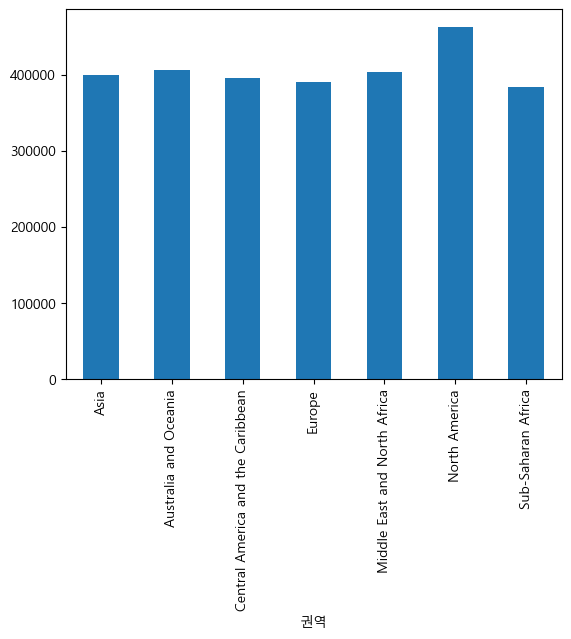

In [40]:
df.groupby('권역')['총이윤'].mean().plot.bar()

<Axes: xlabel='권역'>

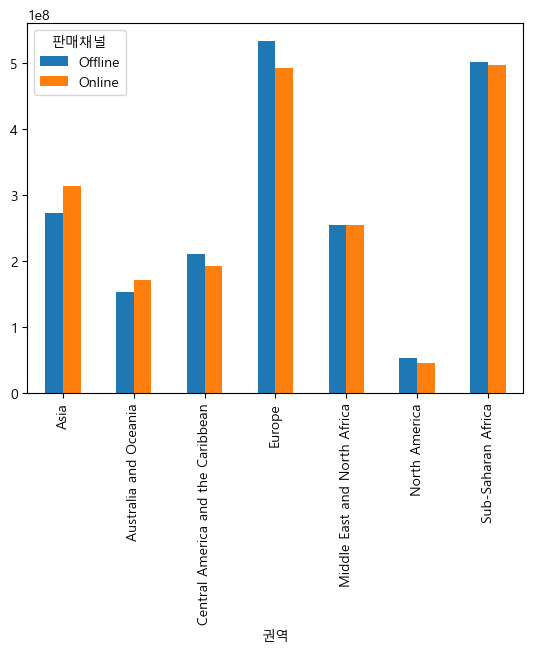

In [41]:
pd.pivot_table(
    df,
    index = '권역',
    columns = '판매채널',
    values = '총이윤',
    aggfunc = 'sum'
).plot.bar()

# 인덱스를 이동하는 함수
> shift(n)
- 인덱스를 n만큼 이동
- n = 1이 기본값 : 바로 전의 인덱스의 값을 가지고 온다.
- 다음의 인덱스의 값을 가지고 오려면? n = -1

# 값의 차이를 출력하는 함수
> diff(periods = n)
- 바로 전의 인덱스의 값과의 차이를 출력
- periods 기본값은 1. shift와 마찬가지로 행의 수를 지정

# 결측치를 다른 값으로 대체하는 함수
> fillna(n, method=?)
- n을 지정해주면 해당하는 값으로 결측치가 대체
- method 속성 : ffill, bfill
    - ffill : 전의 행의 값이 존재하면 그 값으로 대체
    - bfill : 후의 향의 값이 존재하면 그 값으로 대체

In [51]:
corona = pd.read_csv('../csv/corona.csv', index_col=[0])

In [52]:
corona['accExamCnt'] = corona['accExamCnt'].fillna(method='bfill')

In [54]:
corona['accDefRate'] = corona['accDefRate'].fillna(method='bfill')

In [55]:
corona.head(10)

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,21518073.0,2.787908
1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,21518073.0,2.787908
2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,21518073.0,2.787908
3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,21518073.0,2.787908
4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,21518073.0,2.787908
5,2022-06-03 09:08:18.729,24229,18141775,899,20220603,00:00,2022-06-08 09:11:38.938,21518073.0,2.787908
6,2022-06-02 08:58:19.746,24212,18129236,898,20220602,00:00,2022-06-08 09:11:51.985,21518073.0,2.787908
7,2022-06-01 09:07:30.461,24197,18119345,897,20220601,00:00,2022-06-08 09:12:05.316,21518073.0,2.787908
8,2022-05-31 08:55:39.977,24176,18103577,896,20220531,00:00,2022-06-04 08:59:23.637,21518073.0,2.787908
9,2022-05-30 09:01:30.847,24167,18086392,895,20220530,00:00,2022-06-04 08:59:37.203,21518073.0,2.787908


> apply()
- 데이터프레임에서 각 항목들의 데이터를 변환 시켜주는 함수
- 표의 형태의 각 셀의 값 -> apply(연산) -> 연산 안에 각 셀의 값을 넣어서 변환
> lambda()
- 함수를 선언과 동시에 호출을 하는 함수
> map()
- 리스트, 튜플의 형태의 데이터의 각 항목들을 변환 시켜주는 함수

In [59]:
# apply를 사용하여 새로운 파생변수(H/L)에 accDefRate의 값이 1.55보다 크면 Hihg
# 아니면 Low의 값을 대입

# apply + 일반함수
def change(x):
    if x > 1.55:
        return 'High'
    else:
        return 'Low'

corona['accDefRate'].apply(change).value_counts()

Low     420
High    400
Name: accDefRate, dtype: int64

In [58]:
# apply + lambda : 

# if문을 한 줄로 사용 : 참인경우 값 if 조건식 else 거짓인경우 값
corona['accDefRate'].apply(lambda x : 'High' if x > 1.55 else 'Low').value_counts()

Low     420
High    400
Name: accDefRate, dtype: int64

# 데이터프레임의 결합
> concat()
- axis 속성 0, 1 : 행을 결합을 할지, 열을 결합을 할지 지정
- 단순하게 데이터프레임을 결합
> merge()
- 특정한 조건을 기준으로 하여 데이터프레임을 결합
- on 속성에서 합쳐질 데이터프레임의 조건을 넣어주는 부분(컬럼의 이름)
- 조건에 맞는 컬럼의 값을 넣어준다
- how 속성
    - left : 왼쪽에 있는 데이터프레임을 기준으로 결합
    - right : 오른쪽에 있는 데이터프레임을 기준으로 결합
    - inner : 두 데이터프레임의 교집합
    - outer : 두 데이터프레임의 합집합

In [61]:
# csv폴더 안에 num_3 폴더에 있는 파일들을 로드하여 데이터프레임 결합
# 4개의 파일 모두 조인 결합

campaign = pd.read_csv("../csv/num_3/campaign_master.csv")
class_master = pd.read_csv("../csv/num_3/class_master.csv")
customer = pd.read_csv("../csv/num_3/customer_master.csv")
use = pd.read_csv("../csv/num_3/use_log.csv")

In [62]:
campaign.head(1)

,campaign_id,campaign_name
0,CA1,2_일반


In [63]:
class_master.head(1)

,class,class_name,price
0,C01,0_종일,10500


In [64]:
customer.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0


In [65]:
use.head(1)

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01


In [66]:
data = pd.merge(customer, campaign, on='campaign_id', how='inner')
data

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_일반
...,...,...,...,...,...,...,...,...,...
4187,PL405819,XXXX,C01,M,2018-12-15 00:00:00,NaN,CA3,0,1_입회비무료
4188,HI958991,XXXXX,C01,F,2018-12-15 00:00:00,NaN,CA3,0,1_입회비무료
4189,IK039344,XXX,C03,M,2018-12-15 00:00:00,NaN,CA3,0,1_입회비무료
4190,TS950243,XXXX,C01,M,2018-12-15 00:00:00,NaN,CA3,0,1_입회비무료


In [67]:
data = pd.merge(data, class_master, on='class', how='inner')
data

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,2_일반,0_종일,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,2_일반,0_종일,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,2_일반,0_종일,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,2_일반,0_종일,10500
4,IK271057,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,2_일반,0_종일,10500
...,...,...,...,...,...,...,...,...,...,...,...
4187,IK562610,XXXXX,C02,F,2018-12-13 00:00:00,2019-02-28 00:00:00,CA3,1,1_입회비무료,1_주간,7500
4188,HI599354,XXXX,C02,M,2018-12-13 00:00:00,NaN,CA3,0,1_입회비무료,1_주간,7500
4189,GD796859,XX,C02,F,2018-12-14 00:00:00,NaN,CA3,0,1_입회비무료,1_주간,7500
4190,GD082270,XXXX,C02,F,2018-12-14 00:00:00,2019-02-28 00:00:00,CA3,1,1_입회비무료,1_주간,7500


In [68]:
data = pd.merge(data, use, on='customer_id', how='inner')

# 시계열 데이터
> to_datetime(데이터,format=)
- 해당하는 데이터를 시계열 데이터로 변환
- format의 속성은 변경 시키려는 데이터의 구성을 대입
- ex) 202001 -> format = '%Y%m'

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197428 entries, 0 to 197427
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   customer_id    197428 non-null  object
 1   name           197428 non-null  object
 2   class          197428 non-null  object
 3   gender         197428 non-null  object
 4   start_date     197428 non-null  object
 5   end_date       29474 non-null   object
 6   campaign_id    197428 non-null  object
 7   is_deleted     197428 non-null  int64 
 8   campaign_name  197428 non-null  object
 9   class_name     197428 non-null  object
 10  price          197428 non-null  int64 
 11  log_id         197428 non-null  object
 12  usedate        197428 non-null  object
dtypes: int64(2), object(11)
memory usage: 21.1+ MB


In [70]:
# start_date 컬럼의 데이터의 타입을 시계열 변경
# 2019년1월1일 이후 데이터만 출력
data['start_date'] = pd.to_datetime(data['start_date'])

In [71]:
data.sort_values('start_date')

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,log_id,usedate
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,2_일반,0_종일,10500,L00000049014216,2018-04-04
150509,PL928545,XXXXXX,C02,F,2015-05-01,NaN,CA1,0,2_일반,1_주간,7500,L00000049068359,2018-07-11
150508,PL928545,XXXXXX,C02,F,2015-05-01,NaN,CA1,0,2_일반,1_주간,7500,L00000049067825,2018-07-10
150507,PL928545,XXXXXX,C02,F,2015-05-01,NaN,CA1,0,2_일반,1_주간,7500,L00000049064670,2018-07-04
150506,PL928545,XXXXXX,C02,F,2015-05-01,NaN,CA1,0,2_일반,1_주간,7500,L00000049064139,2018-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185934,IK692635,XXXXX,C02,F,2019-03-15,NaN,CA1,0,2_일반,1_주간,7500,L00000049203747,2019-03-20
185935,IK692635,XXXXX,C02,F,2019-03-15,NaN,CA1,0,2_일반,1_주간,7500,L00000049204803,2019-03-22
185936,IK692635,XXXXX,C02,F,2019-03-15,NaN,CA1,0,2_일반,1_주간,7500,L00000049205312,2019-03-23
185937,IK692635,XXXXX,C02,F,2019-03-15,NaN,CA1,0,2_일반,1_주간,7500,L00000049206326,2019-03-25


In [72]:
data.loc[data['start_date'] >= '2019-01-01']

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,log_id,usedate
71364,OA106766,XXXXX,C01,F,2019-01-01,NaN,CA1,0,2_일반,0_종일,10500,L00000049165750,2019-01-10
71365,OA106766,XXXXX,C01,F,2019-01-01,NaN,CA1,0,2_일반,0_종일,10500,L00000049166820,2019-01-12
71366,OA106766,XXXXX,C01,F,2019-01-01,NaN,CA1,0,2_일반,0_종일,10500,L00000049167383,2019-01-13
71367,OA106766,XXXXX,C01,F,2019-01-01,NaN,CA1,0,2_일반,0_종일,10500,L00000049167903,2019-01-14
71368,OA106766,XXXXX,C01,F,2019-01-01,NaN,CA1,0,2_일반,0_종일,10500,L00000049169997,2019-01-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185935,IK692635,XXXXX,C02,F,2019-03-15,NaN,CA1,0,2_일반,1_주간,7500,L00000049204803,2019-03-22
185936,IK692635,XXXXX,C02,F,2019-03-15,NaN,CA1,0,2_일반,1_주간,7500,L00000049205312,2019-03-23
185937,IK692635,XXXXX,C02,F,2019-03-15,NaN,CA1,0,2_일반,1_주간,7500,L00000049206326,2019-03-25
185938,IK692635,XXXXX,C02,F,2019-03-15,NaN,CA1,0,2_일반,1_주간,7500,L00000049207430,2019-03-27


1. 이용 내역
2. 파생변수 2개 생성
3. weekday 요일 파생변수(use date를 기준으로 요일 생성)
4. 년월 파생변수 하나 생성(use date를 기준으로 요일 생성)
5. 요일별 이용 여부를 계산

In [73]:
# usedate를 시계열 변환
data['usedate'] = pd.to_datetime(data['usedate'])

In [74]:
data['weekday'] = data['usedate'].dt.weekday
data.head(2)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,log_id,usedate,weekday
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,2_일반,0_종일,10500,L00000049014216,2018-04-04,2
1,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,2_일반,0_종일,10500,L00000049018989,2018-04-13,4


In [75]:
data['년월'] = data['usedate'].dt.strftime('%Y-%m')
data.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,log_id,usedate,weekday,년월
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,2_일반,0_종일,10500,L00000049014216,2018-04-04,2,2018-04


In [76]:
data['weekday'].value_counts()

6    29351
4    28735
2    28644
0    28095
1    28023
3    27822
5    26758
Name: weekday, dtype: int64

In [78]:
data.head(1)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,campaign_name,class_name,price,log_id,usedate,weekday,년월
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,2_일반,0_종일,10500,L00000049014216,2018-04-04,2,2018-04


In [84]:
use_weekday = data.groupby(['customer_id', '년월', 'weekday'], as_index=False).count()\
    [['customer_id', '년월', 'weekday', 'log_id' ]]

use_weekday.rename(columns={'log_id' : 'count'}, inplace=True)
use_weekday.head(3)

,customer_id,년월,weekday,count
0,AS002855,2018-04,5,4
1,AS002855,2018-05,2,1
2,AS002855,2018-05,5,4


In [89]:
# 각 회원별 가장 많은 count를 가지는 요일을 출력
use_weekday.groupby('customer_id').max()[['weekday', 'count']]

,weekday,count
customer_id,,
AS002855,6,5
AS008805,6,4
AS009013,0,2
AS009373,6,5
AS015233,6,5
...,...,...
TS995853,6,5
TS998593,6,5
TS999079,6,5


In [90]:
# 햠수를 생성
# 인자의 값이 숫자인 형태가 아니면 숫자의 형태가 아니다
# 숫자인 경우 짝수이면 짝수
# 홀수이면 홀수 출력

In [93]:
def func_1(x):
    if type(x) == float:
        return '인자의 타입은 실수이다'
    elif type(x) != int:
        return "숫자의 형태가 아니다"
    else:
        if x % 2 == 0:
            return '짝수'
        else:
            return '홀수'

In [94]:
print(func_1(3))
print(func_1(4))
print(func_1('asd'))
print(func_1(3.2))

홀수
짝수
숫자의 형태가 아니다
인자의 타입은 실수이다


In [ ]:
# 함수 생성
# 매개 변수 2개
# 두 매개변수 사이 값들의 합 리턴
# 3, 5 -> 3+4+5 -> 12리턴
# 두 매개변수의 대소관계는 상관없이 사이의 값들이 합

In [106]:
def func_2(x,y):
    result = 0
    
    if x < y:
        for i in range(x,y+1,1):
            result += i
    else:
        for i in range(y,x+1,1):
            result += i

    return result

In [109]:
def func_3(x,y):
    result = 0      # result : 함수 내에 있는 지역변수
    
    for i in range(min(x,y), max(x,y)+1, 1):
        result += i
    return result

In [110]:
func_3(10,1)

55

In [ ]:
# 함수 생성
# 매개변수는 1개
# 인자값이 12345
# 1+2+3+4+5의 값인 15가 출력이 되도록 함수를 구성

In [136]:
def func_4(x):
    num = 0
    result = 0
    while (x//(10**num) != 0):
        num = num+1
    for i in range(1,num,1):
        result = result + x//(10**(num-i))
    return result

In [138]:
func_4(345)

37

In [117]:
i = 0
while (1001//(10**i) != 0):
        i = i+1
print(i)

4


In [ ]:
def func_5(x):
    result = 0

    while x//10 > 0:
        result += x%10
        x = x // 10
    return result

In [120]:
len(range(4,1,-1))

3

In [129]:
for i in range(4,1,-1):
    print(i)

4
3
2


In [135]:
sum(map(int, '12345'))

15